In [1]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [ ]:
data = TimeSeriesDataFrame.from_path(
    "test.csv"
)
data.head()

In [ ]:
prediction_length = 48
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="bolt_small",
)

In [ ]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);

In [2]:
data = TimeSeriesDataFrame.from_path(
    "site-visitors.csv"
)
data.head()

target
item_id timestamp                  
T000000 2022-11-24 00:00:00       0
        2022-11-24 01:00:00       0
        2022-11-24 02:00:00       0
        2022-11-24 03:00:00       2
        2022-11-24 04:00:00       0

In [8]:
prediction_length = 480
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data=train_data,
    hyperparameters={
        "Chronos": [
            {"model_path": "bolt_tiny", "ag_args": {"name_suffix": "ZeroShot"}},
            {"model_path": "bolt_small", "ag_args": {"name_suffix": "ZeroShot"}},
            {"model_path": "bolt_base", "ag_args": {"name_suffix": "ZeroShot"}}
        ]
    },
    time_limit=60,  # time limit in seconds
    enable_ensemble=False,
)

Beginning AutoGluon training... Time limit = 60s
AutoGluon will save models to 'C:\Users\crazy\Documents\repos\monitoring-demo-2024-12\chronos-ml\AutogluonModels\ag-20241207_193852'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          32
GPU Count:          0
Memory Avail:       40.56 GB / 63.69 GB (63.7%)
Disk Space Avail:   627.10 GB / 951.64 GB (65.9%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_tiny'},
                                 {'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_small'},
                                 {'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_base'}]},
 'k

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/821M [00:00<?, ?B/s]

	-0.2290       = Validation score (-WQL)
	0.02    s     = Training runtime
	174.75  s     = Validation (prediction) runtime
Training complete. Models trained: ['ChronosZeroShot[bolt_tiny]', 'ChronosZeroShot[bolt_small]', 'ChronosZeroShot[bolt_base]']
Total runtime: 177.86 s
Best model: ChronosZeroShot[bolt_tiny]
Best model score: -0.2074


Model not specified in predict, will default to the model with the best validation score: ChronosZeroShot[bolt_tiny]


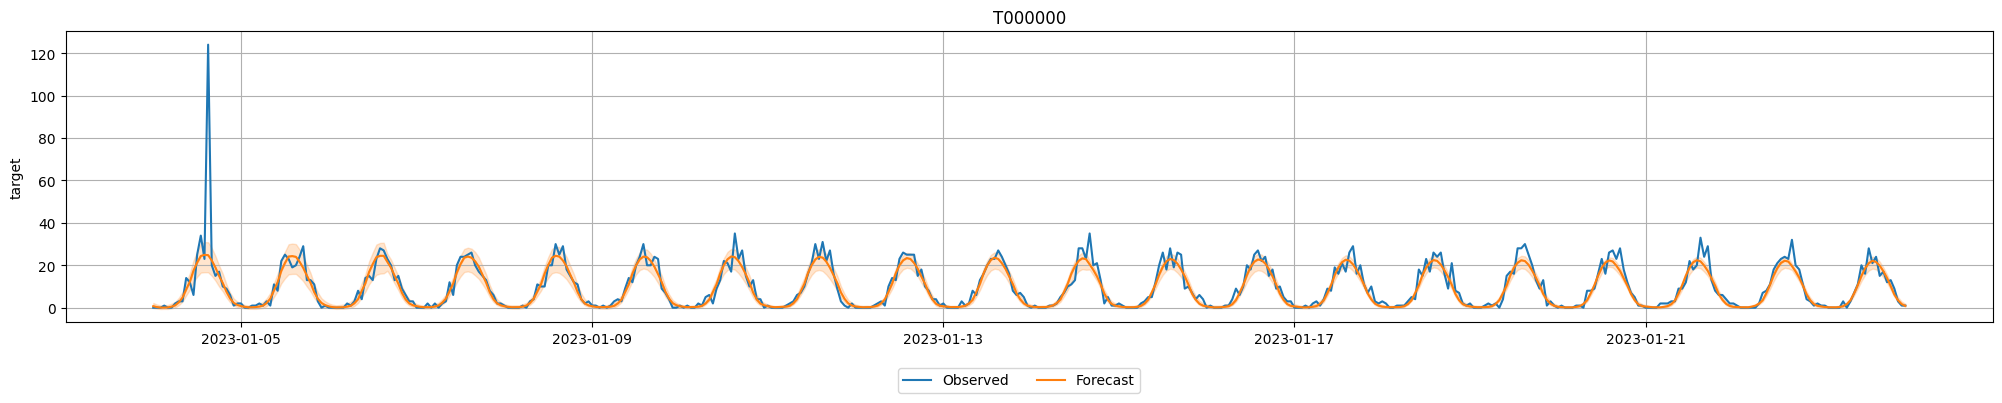

In [6]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids,
    max_history_length=480,
)

In [ ]:
data = TimeSeriesDataFrame.from_path(
    "test_covariates.csv"
)
data.head()

In [ ]:
prediction_length = 8
train_data, test_data = data.train_test_split(prediction_length=prediction_length)

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    target="unit_sales",
    known_covariates_names=["scaled_price", "promotion_email", "promotion_homepage"],
).fit(
    train_data,
    hyperparameters={
        "Chronos": [
            # Zero-shot model WITHOUT covariates
            {
                "model_path": "bolt_small",
                "ag_args": {"name_suffix": "ZeroShot"},
            }
        ],
    },
    enable_ensemble=False,
    time_limit=60,
)

In [ ]:
predictor.leaderboard(test_data)

In [ ]:
predictions = predictor.predict(train_data, known_covariates=1)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids,
    max_history_length=100,
);